<a href="https://colab.research.google.com/github/toyash/Word2Vec_Demo/blob/master/Word2VecDemonstrated_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating word vectors with **Word2Vec**

We are creating word vectors

**Load Dependencies**

In [0]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [0]:
from nltk.corpus import gutenberg

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
len(gutenberg.fileids())

18

### Tokenize Text

In [0]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [9]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [10]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [11]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [12]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [0]:
gberg_sents = gutenberg.sents()

In [14]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [15]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [16]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [17]:
len(gutenberg.words())

2621613

In [0]:
model = Word2Vec(sentences = gberg_sents, size=64, sg=1, window = 10, min_count=5, seed=42, workers=8)

In [19]:
model.save("raw_gutenberg_model.w2v")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Explore model

In [20]:
model = gensim.models.Word2Vec.load("raw_gutenberg_model.w2v")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [21]:
model['dog']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.29642972, -0.07936059, -0.1287618 ,  0.21172729, -0.19232777,
       -0.18497287,  0.2275823 , -0.2926514 ,  0.5269483 , -0.43820634,
       -0.03761466, -0.49549043,  0.31846973, -0.18216667,  0.17878388,
       -0.22103451,  0.38121003,  0.26378047,  0.14982732, -0.2780911 ,
        0.21388912,  0.01967121,  0.30030048,  0.48910722, -0.20159012,
        0.23091213, -0.13946883, -0.19260414,  0.1785338 ,  0.50791794,
        0.23347566,  0.48286647, -0.21142827, -0.6997253 ,  0.10607659,
        0.06323872, -0.34133247,  0.70448124, -0.0989847 ,  0.20916772,
        0.10235769,  0.08658602, -0.11270791,  0.2961648 , -0.3935607 ,
       -0.04554257, -0.05740123,  0.12175927,  0.18874593,  0.11106529,
       -0.20587072, -0.21976155,  0.23609792, -0.2886361 ,  0.07448921,
       -0.35358086, -0.19093193, -0.13343664, -0.29690862, -0.68790627,
       -0.16218519,  0.23055716, -0.09225639, -0.40457293], dtype=float32)

In [22]:
len(model['dog'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


64

In [23]:
model.most_similar('dog')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('puppy', 0.826796293258667),
 ('cage', 0.7722885012626648),
 ('sweeper', 0.7707191705703735),
 ('thief', 0.760360836982727),
 ('pig', 0.7537423968315125),
 ('pet', 0.7484516501426697),
 ('cow', 0.7423561215400696),
 ('broth', 0.7382271885871887),
 ('shell', 0.7377527952194214),
 ('string', 0.7375942468643188)]

In [25]:
model.most_similar('Paris')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('France', 0.8147110342979431),
 ('station', 0.8071305751800537),
 ('Downs', 0.7893259525299072),
 ('Margate', 0.7890139222145081),
 ('Anarchist', 0.7859553098678589),
 ('lunatic', 0.7801159620285034),
 ('statement', 0.779580295085907),
 ('Malvoli', 0.7786455154418945),
 ('asylum', 0.7779222726821899),
 ('thinkers', 0.7748328447341919)]

In [26]:
model.most_similar('think')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('suppose', 0.8737061023712158),
 ('manage', 0.843187689781189),
 ('contradict', 0.8381267786026001),
 ('know', 0.8288850784301758),
 ('downright', 0.8215805888175964),
 ('NOW', 0.8190113306045532),
 ('_you_', 0.8173509836196899),
 ('pretend', 0.8130552172660828),
 ('Mamma', 0.8053466081619263),
 ('_that_', 0.8015843629837036)]

In [27]:
model.most_similar('father')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mother', 0.8676742315292358),
 ('brother', 0.8409769535064697),
 ('sister', 0.8111708164215088),
 ('Amnon', 0.7764604091644287),
 ('daughter', 0.7763310670852661),
 ('wife', 0.759376049041748),
 ('uncle', 0.7412054538726807),
 ('servant', 0.7398891448974609),
 ('master', 0.7370883226394653),
 ('bondwoman', 0.7329305410385132)]

In [29]:
model.doesnt_match("mother father brother lion daughter cat".split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'cat'

In [31]:
model.most_similar(positive=['father','woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sister', 0.7933083772659302),
 ('mother', 0.7742550373077393),
 ('daughter', 0.7623262405395508),
 ('wife', 0.7448264956474304),
 ('husband', 0.7316716909408569),
 ('Sarah', 0.7174670696258545),
 ('brother', 0.7151768803596497),
 ('Sarai', 0.71296226978302),
 ('daughters', 0.7027421593666077),
 ('youngest', 0.6962735652923584)]

In [32]:
model.most_similar(positive=['son','woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Sarai', 0.7384370565414429),
 ('Leah', 0.7364017963409424),
 ('Sarah', 0.7270215749740601),
 ('Bethuel', 0.7246225476264954),
 ('conceived', 0.7183775305747986),
 ('Hagar', 0.7176195383071899),
 ('daughter', 0.7124007940292358),
 ('Abram', 0.7023553848266602),
 ('Rachel', 0.701185941696167),
 ('Nahor', 0.7002677321434021)]

In [33]:
model.most_similar(positive=['husband','woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wife', 0.7267780303955078),
 ('sister', 0.7105981111526489),
 ('conceived', 0.6915595531463623),
 ('mother', 0.6650253534317017),
 ('daughter', 0.6625202894210815),
 ('child', 0.645909309387207),
 ('widow', 0.6417427659034729),
 ('nurse', 0.6325699090957642),
 ('maid', 0.6325352787971497),
 ('daughters', 0.6164043545722961)]

In [35]:
model.most_similar(positive=['king','woman'], negative=['man'], topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Rachel', 0.7353808879852295),
 ('Sarah', 0.7352821826934814),
 ('Laban', 0.7002245187759399),
 ('Sarai', 0.6984153389930725),
 ('Pharaoh', 0.6911200284957886),
 ('Bethuel', 0.6875131130218506),
 ('Solomon', 0.6872724294662476),
 ('Leah', 0.6844809055328369),
 ('Abram', 0.6770251393318176),
 ('Judah', 0.6732800602912903),
 ('Hagar', 0.6727722883224487),
 ('princes', 0.670455813407898),
 ('Padanaram', 0.6636796593666077),
 ('daughter', 0.6624693870544434),
 ('Rebekah', 0.6564892530441284),
 ('birthright', 0.6555999517440796),
 ('Ephron', 0.6551341414451599),
 ('queen', 0.6546604037284851),
 ('Bilhah', 0.6537714600563049),
 ('Shechem', 0.6525983810424805),
 ('Esau', 0.6517279148101807),
 ('Hamor', 0.6498576402664185),
 ('Abimelech', 0.6432329416275024),
 ('David', 0.642397403717041),
 ('Uriah', 0.6397308707237244),
 ('tribute', 0.6388210654258728),
 ('Onan', 0.6377532482147217),
 ('Heth', 0.6345499753952026),
 ('Zilpah', 0.6329516172409058),
 ('Hittite', 0.632408618927002)]

#### Reduce word vector dimensionality with t-SNE

In [37]:
len(model.wv.vocab)

17011

In [39]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [40]:
X

array([[-0.40651512, -0.39976594,  0.03789219, ...,  0.49722236,
        -0.43545255,  0.54765373],
       [ 0.6002105 ,  0.3990143 , -0.5873531 , ...,  0.52680564,
        -0.38564783, -0.1924245 ],
       [-0.30730286,  0.01173665,  0.17167199, ...,  0.5054364 ,
         0.16251543,  0.04343181],
       ...,
       [-0.03407511,  0.04648143, -0.16798066, ...,  0.19012408,
        -0.04413865, -0.11634219],
       [-0.18029097, -0.1206729 , -0.23818523, ...,  0.09178869,
         0.06132615,  0.00526786],
       [-0.19755861, -0.09179241, -0.02985656, ...,  0.20987262,
        -0.1305693 ,  0.05264789]], dtype=float32)

In [41]:
model.wv.vocab

{'[': <gensim.models.keyedvectors.Vocab at 0x7f1bb005f8d0>,
 'Emma': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d748>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d860>,
 'Jane': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d780>,
 ']': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d7f0>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d7b8>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d6a0>,
 'Woodhouse': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d978>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7f1bb006db38>,
 'handsome': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d9b0>,
 'clever': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d8d0>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f1bb006d898>,
 'rich': <gensim.models.keyedvectors.Vocab at 0x7f1bb006da90>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f1bb006da58>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f1bb006db70>,
 'comfortable': <gensim.models.keyedvectors.Vocab at 0x7f1b

In [0]:
tsne = TSNE(n_components=2, n_iter=1000)

In [0]:
X_2d = tsne.fit_transform(X)

In [0]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])

In [0]:
coords_df['token'] = model.wv.vocab.keys()

In [46]:
coords_df.head()

,x,y,token
0,49.865784,27.223450,[
1,-0.689195,63.096714,Emma
2,-31.938572,25.525629,by
3,-5.006139,63.469112,Jane
4,49.802631,27.214870,]


In [0]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

### Visualize 2D representatio of word vectors

In [0]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [49]:
coords_df.head()

,x,y,token
0,49.865784,27.223450,[
1,-0.689195,63.096714,Emma
2,-31.938572,25.525629,by
3,-5.006139,63.469112,Jane
4,49.802630,27.214870,]


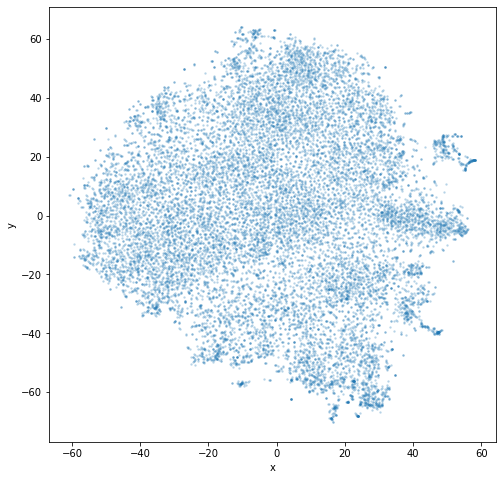

In [50]:
_ = coords_df.plot.scatter('x', 'y',figsize = (8,8), marker='.',s=10, alpha=0.2)

In [0]:
output_notebook()

In [0]:
subset_df = coords_df.sample(n=5000)

In [0]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y = subset_df.y, text = subset_df.token)

In [57]:
show(p)